# OMIS 114 Data Science with Python
## Assignment 3 - Time Series Analysis II

#### Due February 4 at 3:50PM :: 100 Points Total - 51 Points for Camino Quiz; 49 Points for Jupyter Notebook

**Description:**<br>The file 'NVDA.csv' contains Nvidia daily stock price information.<br>Perform an analysis of the Nvidia stock price at market close time series.<br>Prepare this Jupyter notebook file to professionally present your time series analysis.

<ul>
<li>Expand the notebook (insert cells) as required.</li>
<li>To respond to the questions in this noteboook, generate a response in the cell immediately following a question.</li>
<li>Complete the associated quiz on Camino.</li>
<li>The points associated with the assignment questions are earned by computing and providing the correct (expected) solution values on the Camino quiz.</li>
<li>Progress points are associated with an analysis task, and are assigned based upon an assessment of the progress made toward performing the analysis task completely and correctly and generating the correct solution values.</li>
<li>Performing an analysis task correctly and generating the correct solution values earns complete progress points.</li>
<li>Up to 5 progress points for notebook presentation, professionalism, and description of analysis steps (comments).</li>
</ul>

<ul>
<li>Include all steps of the analysis in the submitted notebook.</li>
<li>To earn points on a question, the notebook analysis must compute the value provided.</li>
<li>Include a comment describing each step of the analysis.</li>
<li>The analysis code should also function on any other similar stock data.</li>
<li>Additional Python packages (besides those imported) may not be used in the analysis.</li>
<li>For loops may not be used in the analysis.</li>
<li>Complete this assignment independently, without inappropriate collaboration or assistance.</li>
</ul>

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
import pandas as pd
import numpy as np
import datetime

**Directions:**<br>Execute the following code to create a series object <b>stock</b>.<br>The <b>stock</b> series values correspond to the price at market close of the Nvidia stock for a specific trading day.<br>Rows correspond to a trading day (day that the stock market is open and Nvidia stock is being traded by investors).<br><b>Use the stock series to answer the following questions</b>.

In [5]:
data = pd.read_csv('NVDA.csv',index_col=0, parse_dates=['Date'])
stock = data['Close']

<AxesSubplot:xlabel='Date'>

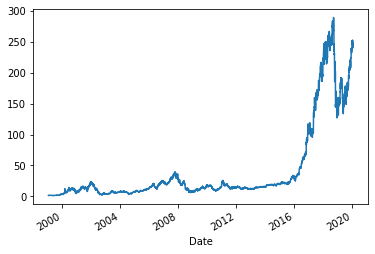

In [6]:
stock.plot()

In [7]:
stock.head()
stock.tail()

Date
1999-01-22    1.640625
1999-01-25    1.812500
1999-01-26    1.671875
1999-01-27    1.666667
1999-01-28    1.661458
Name: Close, dtype: float64

Date
2020-01-22    250.110001
2020-01-23    252.860001
2020-01-24    250.479996
2020-01-27    240.199997
2020-01-28    247.970001
Name: Close, dtype: float64

#### Question 1:<br><br>On which trading day did the stock price close over 130 dollars for the first time?<br><br>Output the timestamp.<br><br>7 points

In [8]:
stock[stock.values > 130].head(1).index #returns the first date that is associated with values above $130

DatetimeIndex(['2017-05-15'], dtype='datetime64[ns]', name='Date', freq=None)

#### Question 2:<br><br>After the stock price closed over 130 dollars for the first time, how many subsequent trading days did it take to close at its historical maximum price?<br><br>5 points for result; plus up to 5 progress points

In [12]:
stock[stock.values > 130].head(1).index #returns the date of the first time, the stock closed at over $130
stock.index[stock.values == stock.values.max()] #returns the date of historical max
stock['2017-05-15':'2018-10-01'] #slices the trading dates between the two dates above
#lenght shows how many trading days from the first time it hit $130 to its historical max

DatetimeIndex(['2017-05-15'], dtype='datetime64[ns]', name='Date', freq=None)

DatetimeIndex(['2018-10-01'], dtype='datetime64[ns]', name='Date', freq=None)

Date
2017-05-15    134.309998
2017-05-16    136.809998
2017-05-17    127.720001
2017-05-18    133.070007
2017-05-19    136.000000
                 ...    
2018-09-25    268.410004
2018-09-26    266.920013
2018-09-27    267.399994
2018-09-28    281.019989
2018-10-01    289.359985
Name: Close, Length: 349, dtype: float64

#### Question 3:<br><br>What are the 5 trading days with the largest gain in stock price (as a percentage)?<br><br>The change in stock price on a specific trading day (as a percentage) is calculated as:<br><br>((price at market close on a trading day) - (price at market close on the previous trading day)) / (price at market close on the previous trading day) * 100<br><br>Note the order of operations implied by the parentheses.<br><br>Output a series object with the trading day and the change in stock price (as a percentage) on that trading day, for the 5 trading days with the largest gain in stock price (as a percentage).<br><br>7 points for result; plus up to 7 progress points

In [91]:
previous_close = stock.shift(1) #makes a copy of stocks time series that has been shifted 1 day back = previous trading day
((stock - previous_close)/previous_close * 100).nlargest(5) #returns the 5 largest % change in stock price

Date
2000-03-07    42.414523
2003-05-09    33.063514
2001-01-03    30.688937
2016-11-11    29.806706
2000-03-13    26.483055
Name: Close, dtype: float64

#### Question 4:<br><br>Consider the following trading strategy:<br>buy the stock at market close on a trading day, then sell the stock at market close on the second subsequent trading day.<br><br>For example, buy the stock at market close on trading day 1, then sell the stock at market close on trading day 3.<br><br>Compute the amounts (in dollars) that would have been gained or lost executing this trading strategy, for each trading day in the series.<br>(the last two trading days in the series do not have sufficient subsequent trading days, so the trading strategy will not apply to these days)<br><br>Each time the stock is bought and then sold (following the trading strategy) is considered one execution of the trading strategy.<br><br>What is the largest amount (in dollars) that would have been lost in one execution of the trading strategy?<br><br>Output the buying and selling trading days for this execution of the trading strategy (resulting in the largest amount lost).<br>Also output the amount (in dollars) lost in this execution of the trading strategy.<br><br>9 points for result; plus up to 9 progress points

In [134]:
future_close = stock.shift(-2) #make a copy of the stock time series shifted 2 days into the future
(future_close - stock).min() #finds the smallest number = greatest loss
stock[(future_close - stock) == (future_close - stock).min()] #returns the line (buying date) which results in the greatest loss
stock[stock.values == future_close[(future_close - stock) == (future_close - stock).min()].values] #returns the line (selling date) which results in the greatest loss

-57.69000199999999

Date
2018-11-15    202.389999
Name: Close, dtype: float64

Date
2018-11-19    144.699997
Name: Close, dtype: float64

#### Question 5:<br><br>Consider a moving window in the stock time series of 10 trading days.<br>Each window includes a specific trading day, and the previous 9 trading days (for a total of 10 trading days).<br><br>Beginning with the tenth trading day in the series, compute the percentage change in stock price for each trading day, based upon the minimum stock price over the previous 9 trading days.<br><br>Therefore for this question, the change in stock price on a specific trading day (as a percentage) is calculated as:<br><br>((price at market close on a trading day) - (minimum price at market close over the previous 9 trading days)) / (minimum price at market close over the previous 9 trading days) * 100<br><br>Note the order of operations implied by the parentheses.<br><br>On which trading days did the change in stock price (as a percentage) exceed 60% (stock price gain of greater than 60%, based upon the minimum stock price over the previous 9 trading days)?<br><br>Output a series object with the trading day and the change in stock price (as a percentage) on that trading day, for all trading days with a change in stock price (as a percentage) greater than 60%.<br><br>11 points for result; plus up to 11 progress points<br><br>Hint: use a rolling minimum - today + previous 9 trading days, rolling(10).

In [109]:
rol = stock.rolling(10) #gets the last 9 trading days
change = (stock - rol.min()) / rol.min() * 100 #calculates the change in stock price on every trading day based on the minimum stock price over the last 9 trading days
change[change.values > 60] #returns the change in stock price that is greater that 60%

Date
2000-02-18     77.011484
2000-02-22     64.263296
2000-02-23     61.162070
2000-03-09     73.112192
2000-03-10    103.667739
2000-03-13    157.605178
2000-03-14     90.075506
2000-03-15     82.308515
2000-03-16     60.977559
2000-03-17     70.726503
2001-01-11     60.334040
2001-10-12     69.304849
2001-10-15     68.551093
Name: Close, dtype: float64

#### Question 6:<br><br>Throughout the time series, what were the worst possible buy and sell pair of transactions (as a percentage loss)?<br><br>Identify the buying and selling trading days that would have incurred the largest loss (as a percentage) in that pair of transactions, if the stock were bought at market close on a trading day, and then sold at market close on any subsequent trading day.<br><br>Any trading day in the time series could be identified as the buying trading day (except for the last trading day in the series).<br>The selling trading day must follow the buying trading day (the stock is bought first, then sold on a subsequent trading day).<br><br>Per the assignment directions, for loops may not be used to find the solution.<br>The analysis should also function on any other similar stock data.<br><br>The change in stock price (as a percentage) between a buying trading day and a selling trading day is calculated as:<br><br>((price at market close on the selling trading day) - (price at market close on the buying trading day)) / (price at market close on the buying trading day) * 100<br><br>Note the order of operations implied by the parentheses.<br><br>Output the buying trading day and the selling trading day that would have incurred the largest loss (as a percentage) in that pair of transactions.<br>Also output the change in stock price (as a percentage) between the buying trading day and the selling trading day.<br><br>Hint: research and explore the time series functions cummax() or cummin(); cummax() / cummin() return the maximum / minimum value of the previous elements in the time series.<br><br>12 points for result; plus up to 12 progress points

In [170]:
((stock - stock.cummax()) / stock.cummax() * 100).nsmallest(1) #returns the smallest percentage = greatest percentage loss & and the sell date associated with the greatest percentage loss
stock[stock.values == stock.cummax()['2002-10-09']].index #returns the buy date that would result in the greatest percentage loss

Date
2002-10-09   -89.722492
Name: Close, dtype: float64

DatetimeIndex(['2002-01-03'], dtype='datetime64[ns]', name='Date', freq=None)

In [171]:
((stock - stock.cummax()) / stock.cummax() * 100).nsmallest(1).index #gives sell date of the greatest percentage loss

DatetimeIndex(['2002-10-09'], dtype='datetime64[ns]', name='Date', freq=None)